In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from mpl_toolkits.mplot3d import Axes3D

In [2]:
B = 135e6  # Sweep Bandwidth
T = 36.5e-6  # Sweep Time
N = 512  # Sample Length
L = 128  # Chirp Total
c = 3e8  # Speed of Light
f0 = 76.5e9  # Start Frequency
NumRangeFFT = 512  # Range FFT Length
NumDopplerFFT = 128  # Doppler FFT Length
rangeRes = c/2/B  # Range Resolution
velRes = c/2/f0/T/NumDopplerFFT  # Velocity Resolution
maxRange = rangeRes * NumRangeFFT/2  # Max Range
maxVel = velRes * NumDopplerFFT/2  # Max Velocity
tarR = [50, 90]  # Target Range
tarV = [3, 20]  # Target Velocity


In [3]:

S1 = np.zeros((L, N), dtype=complex)
for l in range(0, L):
    for n in range(0, N):
        S1[l][n] = np.exp(np.complex(0, 1) * 2 * np.pi * (((2 * B * (tarR[0] + tarV[0] * T * l))/(c * T) + (2 * f0 * tarV[0])/c) * (T/N) * n + (2 * f0 * (tarR[0] + tarV[0] * T * l))/c))
 
S2 = np.zeros((L, N), dtype=complex)
for l in range(0, L):
    for n in range(0, N):
        S2[l][n] = np.exp(np.complex(0, 1) * 2 * np.pi * (((2 * B * (tarR[1] + tarV[1] * T * l))/(c * T) + (2 * f0 * tarV[1])/c) * (T/N) * n + (2 * f0 * (tarR[1] + tarV[1] * T * l))/c))
 
sigReceive = S1 + S2


In [4]:
sigReceive

array([[ 2.        -1.33383867e-11j,  1.3924851 +1.36588044e+00j,
         0.03480864+1.80430842e+00j, ...,  1.05201853-1.57600973e+00j,
         1.67037219-3.49831923e-01j,  1.20778871+7.72968796e-01j],
       [ 0.24405923+1.06272877e+00j, -0.36218226+5.90709237e-01j,
        -0.25334608+6.33474938e-02j, ...,  0.46074707+1.76174598e-01j,
         0.02197755+4.79431654e-02j,  0.13237743-3.67279306e-01j],
       [ 0.7297787 -3.53854801e-01j,  1.13273235+3.80769195e-01j,
         0.68935501+1.35457449e+00j, ...,  0.19202955-1.34480741e+00j,
         1.30974861-1.00230435e+00j,  1.84456666+2.27215440e-01j],
       ...,
       [ 0.02022931-3.54881616e-01j,  0.57909178-5.26137277e-01j,
         1.16964505+4.54176699e-02j, ..., -0.77935428-1.06823983e+00j,
         0.23599071-1.60446572e+00j,  1.46704957-1.11162027e+00j],
       [ 1.81751425-3.09739734e-01j,  1.61712092+1.12432447e+00j,
         0.3712264 +1.96284366e+00j, ...,  1.30016477-1.49103797e+00j,
         1.85853904-1.44023323e-01j

In [5]:
sigRangeWin = np.zeros((L, N), dtype=complex)
for l in range(0, L):
    sigRangeWin[l] = np.multiply(sigReceive[l], np.hamming(N).T)

In [6]:
sigRangeFFT = np.zeros((L, N), dtype=complex)
for l in range(0, L):
    sigRangeFFT[l] = np.fft.fft(sigRangeWin[l], NumRangeFFT)


In [7]:
sigDopplerWin = np.zeros((L, N), dtype=complex)
for n in range(0, N):
    sigDopplerWin[:, n] = np.multiply(sigRangeFFT[:, n], np.hamming(L).T)

In [8]:
sigDopplerFFT = np.zeros((L, N), dtype=complex)
for n in range(0, N):
    sigDopplerFFT[:, n] = np.fft.fft(sigDopplerWin[:, n], NumDopplerFFT)

<ipython-input-9-49cdd28e0f4b>:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


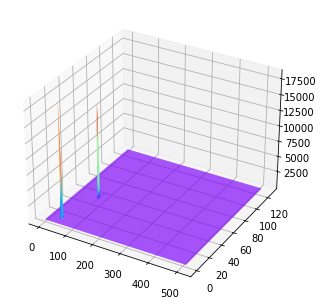

In [9]:
fig = plt.figure()
ax = Axes3D(fig)
 
x = np.arange(NumRangeFFT)
y = np.arange(NumDopplerFFT)
X, Y = np.meshgrid(x, y)
Z = np.abs(sigDopplerFFT)
ax.plot_surface(X, Y, Z,
                rstride=1, # rstride(row) specifies the span of the row
                                 cstride=1, # cstride(column) specifies the span of the column
                                 cmap=plt.get_cmap('rainbow')) # Set color mapping
plt.show()


/home/arkaprabha/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


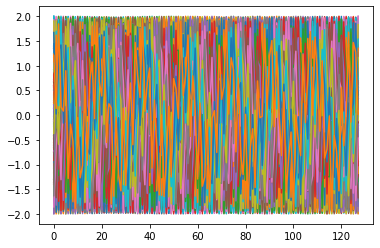

In [11]:
plt.plot(sigReceive)
plt.show()